17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


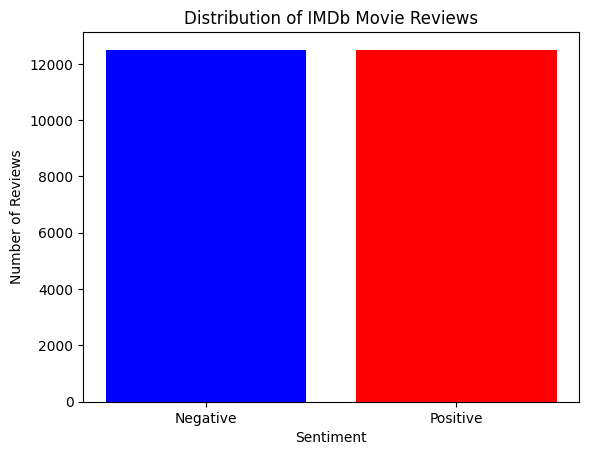

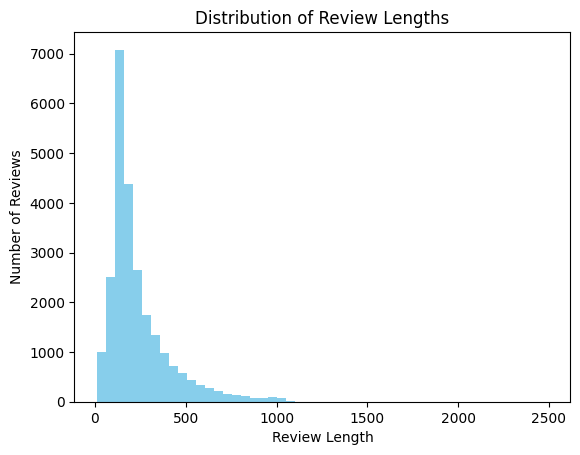

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.7225 - loss: 0.5237 - val_accuracy: 0.8446 - val_loss: 0.3755
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9029 - loss: 0.2494 - val_accuracy: 0.8700 - val_loss: 0.3079
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9314 - loss: 0.1883 - val_accuracy: 0.8670 - val_loss: 0.3485
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9540 - loss: 0.1359 - val_accuracy: 0.8348 - val_loss: 0.4216
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9618 - loss: 0.1075 - val_accuracy: 0.8423 - val_loss: 0.3884
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8437 - loss: 0.3878
Test Accuracy: 0.8423
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     12500
           1       0.87      0.81      0.84     12500

    accuracy                           0.84     25000
   m

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report

#parameters
vocab_size = 10000
max_len = 200
embedding_dim = 128

#load IMDb dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

#count positive and negative reviews in the training set
unique, counts = np.unique(y_train, return_counts=True)
review_distribution = dict(zip(unique, counts))

#visualize the sentiment distribution
plt.bar(review_distribution.keys(), review_distribution.values(), color=['blue', 'red'])
plt.title('Distribution of IMDb Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

#visualize review lengths
review_lengths = [len(review) for review in X_train]
plt.hist(review_lengths, bins=50, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

#padding sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#define model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(units=64),
    Dense(units=1, activation='sigmoid')
])

#compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train model
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

#evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

#predict on test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # flatten to make shape compatible

#print classification metrics
print(classification_report(y_test, y_pred))

#print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
